# Graduate Admission

This analysis will be seperated into two sections, with different purposes and audiences. The first section is the analysis of regression model, attempting to identify important factors in graduate admission for applicants who are preparing the application. The second section contains prediciton models, aiming at predicting the probability of admit giving the applcation materials they have.

## Section 1: 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 29 11:55:29 2019

@author: nishil
"""

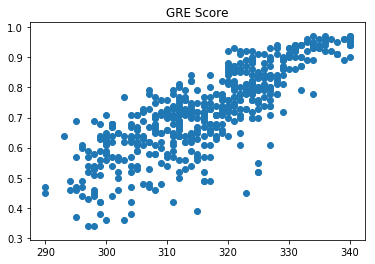

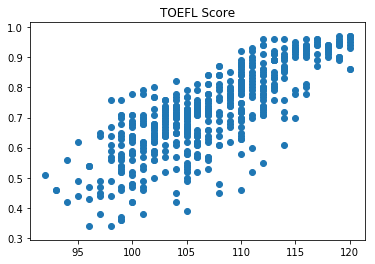

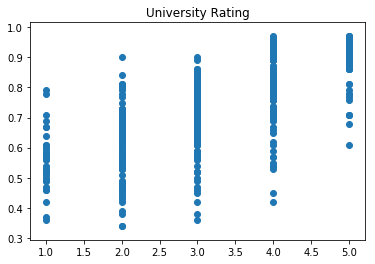

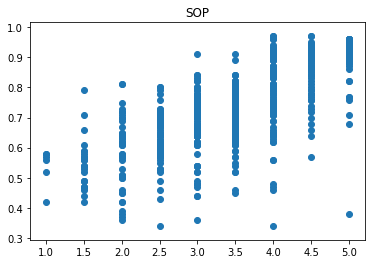

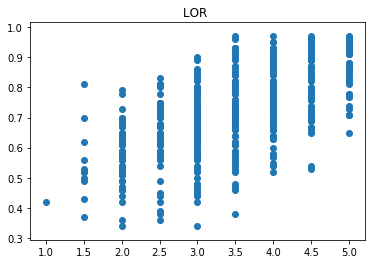

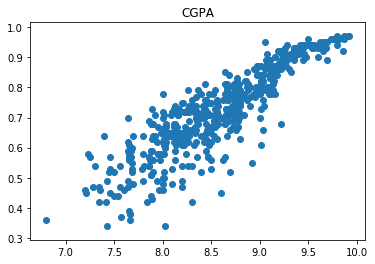

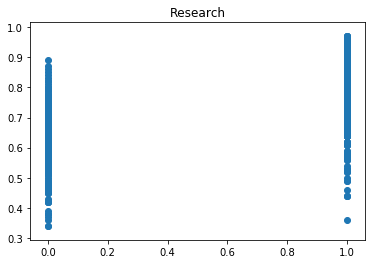

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# Prepare Data
# =============================================================================
grad_data = pd.read_csv("C:\\Users\\nishi\\OneDrive\\Kaggle\\Graduate Admission\\Admission_Predict_Ver1.1.csv")
grad_data.columns


# =============================================================================
# EDA
# =============================================================================
# Scatter Plat
for col in grad_data.columns[1:8]:
    plt.scatter(grad_data[col], grad_data["Chance of Admit "])
    plt.title(col)
    plt.show()

# Correlation
grad_data.drop(columns = ["Serial No."]).corr()

In [ ]:
# =============================================================================
# Fit Model
# =============================================================================
import statsmodels.api as sm
import statsmodels.stats
X = grad_data.drop(columns = ["Serial No.", "Chance of Admit "])
X = sm.add_constant(X)
Y = grad_data["Chance of Admit "]

model = sm.OLS(Y,X)
reg_fit = model.fit()

# Summary of simple linear regression model
reg_fit.summary()

# Residual Analysis
residuals = reg_fit.resid
plt.plot(residuals, 'bo')
plt.hist(residuals)
abs(residuals).mean() #average absolute error made by model
(sum([i**2 for i in residuals])/len(residuals))**0.5 #mean square error made by model
residuals.describe()


statsmodels.stats.diagnostic.kstest_normal(residuals)